In [1]:
from keras.utils import np_utils
from keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.losses import binary_crossentropy
from keras.optimizers import Adadelta, SGD
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
from keras.models import Model
import cv2
import os
import numpy as np
import keras
import h5py
import numpy as np
from keras import regularizers
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score

from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras import backend as K
from keras.models import load_model
import keras

Using TensorFlow backend.


In [2]:
x_train = np.load('x_train_64_norm.npy')
y_train = np.load('y_train_64.npy')
x_test = np.load('x_test_64_norm.npy')
y_test = np.load('y_test_64.npy')

In [13]:
def expand_dims(val):
    val_exp = np.expand_dims(val, axis=4)
    return val_exp

In [14]:
x_train = expand_dims(x_train)
#x_test = expand_dims(x_test)

In [15]:
def m_naive():
    
    filter_size = 32
    input_layer = Input((128, 128, 64, 1)) # 1 is just dummy dimension good for nothing 
    
    conv_layer1 = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu')(input_layer)
    pooling_layer1 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer1)

    pooling_layer1 = BatchNormalization()(pooling_layer1)  
    conv_layer2 = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu')(pooling_layer1)
    pooling_layer2 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer2)
    pooling_layer2 = BatchNormalization()(pooling_layer2)
    conv_layer3 = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu')(pooling_layer1)
    pooling_layer3 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer3)
    pooling_layer3 = BatchNormalization()(pooling_layer3)
    conv_layer4 = Conv3D(filters=128, kernel_size=(3, 3, 3), activation='relu')(pooling_layer3)
    pooling_layer4 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer4)
    pooling_layer4 = BatchNormalization()(pooling_layer4)
    conv_layer5 = Conv3D(filters=256, kernel_size=(3, 3, 3), activation='relu')(pooling_layer4)
    pooling_layer5 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer5)
    
    pooling_layer9 = BatchNormalization()(pooling_layer5)
    flatten_layer = Flatten()(pooling_layer9)

    #dense_layer1 = Dense(units=1028, activation='relu')(flatten_layer)
    #dense_layer1 = Dropout(0.4)(dense_layer1)
    
    
    #dense_layer2 = Dense(units=1028, activation='relu')(flatten_layer)
    #dense_layer2 = Dropout(0.4)(dense_layer2)
    
    dense_layer3 = Dense(units=512, activation='relu')(flatten_layer)
    dense_layer3 = Dropout(0.4)(dense_layer3)

    dense_layer4 = Dense(units=256, activation='relu')(dense_layer3)
    dense_layer4 = Dropout(0.4)(dense_layer3)
  
    output_layer = Dense(units=2, activation='softmax')(dense_layer4)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(loss='mae', optimizer=SGD(lr=1e-06, momentum=0.99, decay=0.0, nesterov=False), metrics=['acc']) # # optimizers.SGD(lr=1e-4, momentum=0.9)
    
    return model

model = None
model = m_naive()
model.summary()

W0825 23:08:50.210763  6452 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\clef\lib\site-packages\keras\backend\tensorflow_backend.py:58: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 23:08:50.213761  6452 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\clef\lib\site-packages\keras\backend\tensorflow_backend.py:442: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 23:08:50.218759  6452 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\clef\lib\site-packages\keras\backend\tensorflow_backend.py:3543: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0825 23:08:50.653494  6452 deprecation.py:506] From C:\ProgramData\Anaconda3\envs\clef\lib\site-packages\keras\backend\tensorflow_backend.py:1205: calling reduce_prod_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future ve

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 64, 1)   0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 126, 126, 62, 64)  1792      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 63, 63, 31, 64)    0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 63, 63, 31, 64)    256       
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 61, 61, 29, 64)    110656    
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 30, 30, 14, 64)    0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 14, 64)    256       
__________

In [19]:


# set the learning rate
#K.set_value(model.optimizer.lr, 0.01) 

h=model.fit(x=x_train,     
            y=y_train, 
            batch_size=2, 
            epochs=200, 
            verbose=1, 
            #validation_data = (x_test,y_test),
            #validation_split = 0.1,
            shuffle=True,
            )


W0825 23:08:52.823502  6452 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\clef\lib\site-packages\keras\backend\tensorflow_backend.py:899: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0825 23:08:52.826485  6452 deprecation.py:506] From C:\ProgramData\Anaconda3\envs\clef\lib\site-packages\keras\backend\tensorflow_backend.py:625: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0825 23:08:52.927442  6452 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\clef\lib\site-packages\keras\backend\tensorflow_backend.py:886: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/200
218/218 [==============================] - 79s - loss: 0.4955 - acc: 0.4954    
Epoch 2/200
218/218 [==============================] - 68s - loss: 0.4990 - acc: 0.4862    
Epoch 3/200
218/218 [==============================] - 74s - loss: 0.4873 - acc: 0.5138    
Epoch 4/200
218/218 [==============================] - 74s - loss: 0.4631 - acc: 0.5734    
Epoch 5/200
218/218 [==============================] - 75s - loss: 0.4485 - acc: 0.5596    
Epoch 6/200
218/218 [==============================] - 78s - loss: 0.4423 - acc: 0.5917    
Epoch 7/200
218/218 [==============================] - 78s - loss: 0.4255 - acc: 0.6468    
Epoch 8/200
218/218 [==============================] - 78s - loss: 0.4318 - acc: 0.5872    
Epoch 9/200
218/218 [==============================] - 79s - loss: 0.3704 - acc: 0.7156    
Epoch 10/200
218/218 [==============================] - 79s - loss: 0.4098 - acc: 0.6330    
Epoch 11/200
218/218 [==============================] - 79s - loss: 0.3985 - ac

218/218 [==============================] - 79s - loss: 0.0110 - acc: 1.0000    
Epoch 177/200
218/218 [==============================] - 79s - loss: 0.0104 - acc: 1.0000    
Epoch 178/200
218/218 [==============================] - 79s - loss: 0.0119 - acc: 1.0000    
Epoch 179/200
218/218 [==============================] - 79s - loss: 0.0103 - acc: 1.0000    
Epoch 180/200
218/218 [==============================] - 79s - loss: 0.0106 - acc: 1.0000    
Epoch 181/200
218/218 [==============================] - 78s - loss: 0.0150 - acc: 1.0000    
Epoch 182/200
218/218 [==============================] - 78s - loss: 0.0128 - acc: 1.0000    
Epoch 183/200
218/218 [==============================] - 78s - loss: 0.0118 - acc: 0.9954    
Epoch 184/200
218/218 [==============================] - 78s - loss: 0.0132 - acc: 1.0000    
Epoch 185/200
218/218 [==============================] - 78s - loss: 0.0093 - acc: 1.0000    
Epoch 186/200
218/218 [==============================] - 78s - loss: 0.011

In [20]:
def plot_loss_accu(history):
    loss = history.history['loss']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'g')
    plt.title('Training loss')
    plt.legend(['train'], loc='upper right')
    plt.grid()
    plt.show()
    loss = history.history['acc']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'r')
    plt.title('Training accuracy')
    plt.legend(['train'], loc='lower right')
    plt.grid()
    plt.show()

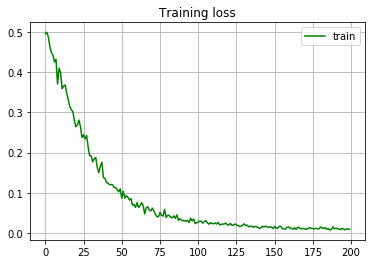

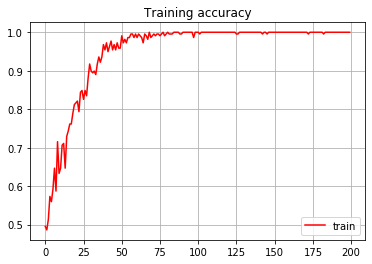

In [21]:
plot_loss_accu(h) # depth = 32

In [22]:
model.save("best_model.h5")

# Inference & Submission

In [24]:
model = None
model = load_model("best_model.h5")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 64, 1)   0         
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 126, 126, 62, 64)  1792      
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 63, 63, 31, 64)    0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 63, 63, 31, 64)    256       
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 61, 61, 29, 64)    110656    
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 30, 30, 14, 64)    0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 30, 30, 14, 64)    256       
__________

In [24]:
x_test = expand_dims(x_test)

In [26]:
res = []
for i in x_test:
    i = np.expand_dims(i, axis=0)
    y_pred = model.predict(i)
    res.append(y_pred)
    print(i.shape)

(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128,

In [27]:
res = np.array(res)

In [28]:
res

array([[[2.53234301e-02, 9.32076156e-01]],

       [[9.49556708e-01, 7.47595429e-02]],

       [[9.66570914e-01, 9.08111334e-02]],

       [[9.05116498e-01, 1.67651903e-02]],

       [[7.62903273e-01, 3.47199917e-01]],

       [[9.84465539e-01, 2.14268137e-02]],

       [[4.88073200e-01, 5.72760284e-01]],

       [[8.38962913e-01, 2.25058109e-01]],

       [[2.16706231e-01, 4.99214679e-01]],

       [[8.24397266e-01, 1.91924497e-01]],

       [[8.85033906e-01, 8.12596604e-02]],

       [[9.63601530e-01, 8.71849805e-02]],

       [[7.98487723e-01, 2.83387363e-01]],

       [[8.81968677e-01, 1.19600900e-01]],

       [[9.90075648e-01, 4.58581373e-03]],

       [[9.99198735e-01, 4.43978730e-04]],

       [[6.68140292e-01, 4.64045495e-01]],

       [[6.71015501e-01, 4.59583461e-01]],

       [[3.05712223e-01, 5.43572307e-01]],

       [[9.83097434e-01, 1.23935230e-02]],

       [[7.38229334e-01, 1.89614683e-01]],

       [[5.13376296e-03, 9.94171560e-01]],

       [[1.71864584e-01, 9.25623

In [29]:
p = res[:,:, 1]

In [30]:
y_test.shape

(22, 2)

In [31]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import pandas as pd

In [32]:
dt = pd.read_csv('TestSet_metaData.csv')
dt.head()

,Filename,md_Disability,md_Relapse,md_SymptomsOfTB,md_Comorbidity,md_Bacillary,md_DrugResistance,md_HigherEducation,md_ExPrisoner,md_Alcoholic,md_Smoking
0,CTR_TST_001.nii.gz,0,1,1,1,0,0,1,0,0,0
1,CTR_TST_002.nii.gz,0,1,0,0,1,4,0,0,0,1
2,CTR_TST_003.nii.gz,0,0,0,0,1,3,0,0,0,1
3,CTR_TST_004.nii.gz,0,1,1,0,0,0,0,0,1,1
4,CTR_TST_005.nii.gz,1,1,0,0,1,3,0,0,0,1


In [33]:
patient_names = dt['Filename'].values
len(patient_names)


117

In [34]:
names = []

for name in patient_names:
    names.append(name[:-7])

names

['CTR_TST_001',
 'CTR_TST_002',
 'CTR_TST_003',
 'CTR_TST_004',
 'CTR_TST_005',
 'CTR_TST_006',
 'CTR_TST_007',
 'CTR_TST_008',
 'CTR_TST_009',
 'CTR_TST_010',
 'CTR_TST_011',
 'CTR_TST_012',
 'CTR_TST_013',
 'CTR_TST_014',
 'CTR_TST_015',
 'CTR_TST_016',
 'CTR_TST_017',
 'CTR_TST_018',
 'CTR_TST_019',
 'CTR_TST_020',
 'CTR_TST_021',
 'CTR_TST_022',
 'CTR_TST_023',
 'CTR_TST_024',
 'CTR_TST_025',
 'CTR_TST_026',
 'CTR_TST_027',
 'CTR_TST_028',
 'CTR_TST_029',
 'CTR_TST_030',
 'CTR_TST_031',
 'CTR_TST_032',
 'CTR_TST_033',
 'CTR_TST_034',
 'CTR_TST_035',
 'CTR_TST_036',
 'CTR_TST_037',
 'CTR_TST_038',
 'CTR_TST_039',
 'CTR_TST_040',
 'CTR_TST_041',
 'CTR_TST_042',
 'CTR_TST_043',
 'CTR_TST_044',
 'CTR_TST_045',
 'CTR_TST_046',
 'CTR_TST_047',
 'CTR_TST_048',
 'CTR_TST_049',
 'CTR_TST_050',
 'CTR_TST_051',
 'CTR_TST_052',
 'CTR_TST_053',
 'CTR_TST_054',
 'CTR_TST_055',
 'CTR_TST_056',
 'CTR_TST_057',
 'CTR_TST_058',
 'CTR_TST_059',
 'CTR_TST_060',
 'CTR_TST_061',
 'CTR_TST_062',
 'CTR_TS

In [35]:
probab = []

for p in res:
    # probability of HIGH severity as required to make submission
    probab.append(p[0][1])
    
probab

[0.93207616,
 0.07475954,
 0.09081113,
 0.01676519,
 0.34719992,
 0.021426814,
 0.5727603,
 0.22505811,
 0.49921468,
 0.1919245,
 0.08125966,
 0.08718498,
 0.28338736,
 0.1196009,
 0.0045858137,
 0.00044397873,
 0.4640455,
 0.45958346,
 0.5435723,
 0.012393523,
 0.18961468,
 0.99417156,
 0.92562324,
 0.067730755,
 0.8294393,
 0.2548511,
 0.9217031,
 0.23812045,
 0.13018993,
 0.099810235,
 0.42264223,
 0.5473512,
 0.47168383,
 0.2441494,
 0.39701626,
 0.9518072,
 0.9958514,
 0.019192467,
 0.04722117,
 0.18932006,
 0.6916511,
 0.49647903,
 0.079180054,
 0.39793998,
 0.08615536,
 0.30595905,
 0.82072157,
 0.01251459,
 0.98804605,
 0.5071496,
 0.016253961,
 0.00069014117,
 0.40479285,
 0.7725169,
 0.1169417,
 0.057991475,
 0.8125556,
 0.068643175,
 0.78822845,
 0.11096363,
 0.73326534,
 0.98875135,
 0.6926539,
 0.9191319,
 0.948982,
 0.56041414,
 0.35744014,
 0.5080976,
 0.24602737,
 0.8643273,
 0.00606519,
 0.58480036,
 0.0978117,
 0.4637233,
 0.0014037905,
 0.18625155,
 0.12384202,
 0.04

In [36]:
for n, p in zip(names, probab):
    print(n, p)

CTR_TST_001 0.93207616
CTR_TST_002 0.07475954
CTR_TST_003 0.09081113
CTR_TST_004 0.01676519
CTR_TST_005 0.34719992
CTR_TST_006 0.021426814
CTR_TST_007 0.5727603
CTR_TST_008 0.22505811
CTR_TST_009 0.49921468
CTR_TST_010 0.1919245
CTR_TST_011 0.08125966
CTR_TST_012 0.08718498
CTR_TST_013 0.28338736
CTR_TST_014 0.1196009
CTR_TST_015 0.0045858137
CTR_TST_016 0.00044397873
CTR_TST_017 0.4640455
CTR_TST_018 0.45958346
CTR_TST_019 0.5435723
CTR_TST_020 0.012393523
CTR_TST_021 0.18961468
CTR_TST_022 0.99417156
CTR_TST_023 0.92562324
CTR_TST_024 0.067730755
CTR_TST_025 0.8294393
CTR_TST_026 0.2548511
CTR_TST_027 0.9217031
CTR_TST_028 0.23812045
CTR_TST_029 0.13018993
CTR_TST_030 0.099810235
CTR_TST_031 0.42264223
CTR_TST_032 0.5473512
CTR_TST_033 0.47168383
CTR_TST_034 0.2441494
CTR_TST_035 0.39701626
CTR_TST_036 0.9518072
CTR_TST_037 0.9958514
CTR_TST_038 0.019192467
CTR_TST_039 0.04722117
CTR_TST_040 0.18932006
CTR_TST_041 0.6916511
CTR_TST_042 0.49647903
CTR_TST_043 0.079180054
CTR_TST_044 0

In [37]:
with open('submission_{}.txt'.format(path_model), 'w') as f:
    for n, p in zip(names, probab):
        print(n,",", p)
        f.write(str(n))
        f.write(",")
        f.write(str(p))
        f.write("\n")
        
f.close()

CTR_TST_001 , 0.93207616
CTR_TST_002 , 0.07475954
CTR_TST_003 , 0.09081113
CTR_TST_004 , 0.01676519
CTR_TST_005 , 0.34719992
CTR_TST_006 , 0.021426814
CTR_TST_007 , 0.5727603
CTR_TST_008 , 0.22505811
CTR_TST_009 , 0.49921468
CTR_TST_010 , 0.1919245
CTR_TST_011 , 0.08125966
CTR_TST_012 , 0.08718498
CTR_TST_013 , 0.28338736
CTR_TST_014 , 0.1196009
CTR_TST_015 , 0.0045858137
CTR_TST_016 , 0.00044397873
CTR_TST_017 , 0.4640455
CTR_TST_018 , 0.45958346
CTR_TST_019 , 0.5435723
CTR_TST_020 , 0.012393523
CTR_TST_021 , 0.18961468
CTR_TST_022 , 0.99417156
CTR_TST_023 , 0.92562324
CTR_TST_024 , 0.067730755
CTR_TST_025 , 0.8294393
CTR_TST_026 , 0.2548511
CTR_TST_027 , 0.9217031
CTR_TST_028 , 0.23812045
CTR_TST_029 , 0.13018993
CTR_TST_030 , 0.099810235
CTR_TST_031 , 0.42264223
CTR_TST_032 , 0.5473512
CTR_TST_033 , 0.47168383
CTR_TST_034 , 0.2441494
CTR_TST_035 , 0.39701626
CTR_TST_036 , 0.9518072
CTR_TST_037 , 0.9958514
CTR_TST_038 , 0.019192467
CTR_TST_039 , 0.04722117
CTR_TST_040 , 0.18932006
CT